# Desain dari Persyaratan Respons Amplitudo

Desain menggunakan baik fir_design_helper maupun iir_design_helper dimulai dengan mengidentifikasi persyaratan respons amplitudo, seperti frekuensi kritis jalur lewat filter, frekuensi kritis jalur hentian, gelombang berombak jalur lewat, dan penurunan jalur hentian. Kemudian, jumlah taps/koefisien (untuk FIR) atau urutan filter (untuk IIR) yang dibutuhkan untuk memenuhi persyaratan ini ditentukan. Hasilnya adalah array koefisien filter yang dikembalikan sebagai b untuk FIR, dan untuk IIR, baik array b dan a, serta array sos 2D, yang mewakili kaskade dari topologi bagian orde kedua yang sesuai untuk filter IIR.

Untuk kasus FIR kita memiliki dalam domain $z$:

$$
    H_\text{FIR}(z) = \sum_{k=0}^N b_k z^{-k}
$$

dengan ndarray b = $[b_0, b_1, \ldots, b_N]$. Untuk kasus IIR kita memiliki dalam domain $z$:

$$\begin{align}
    H_\text{IIR}(z) &= \frac{\sum_{k=0}^M b_k z^{-k}}{\sum_{k=1}^N a_k z^{-k}} \\
    &= \prod_{k=0}^{N_s-1} \frac{b_{k0} + b_{k1} z^{-1} + b_{k2} z^{-2}}{1 + a_{k1} z^{-1} + a_{k2} z^{-2}} = \prod_{k=0}^{N_s-1} H_k(z)
\end{align}$$

di mana $N_s = \lfloor(N+1)/2\rfloor$. Untuk bentuk b/a, koefisien disusun sebagai berikut:

```python
b = [b0, b1, ..., bM-1], the numerator filter coefficients
a = [a0, a1, ..., aN-1], the denominator filter ceofficients
```
Untuk bentuk sos, setiap baris dari array sos 2D sesuai dengan koefisien dari $H_k(z)$, sebagai berikut:

```python
SOS_mat = [[b00, b01, b02, 1, a01, a02], #biquad 0
           [b10, b11, b12, 1, a11, a12], #biquad 1
            .
            .
           [bNs-10, bNs-11, bNs-12, 1, aNs-11, aNs-12]] #biquad Ns-1

# Desain Filter FIR Fasa Linier

Banyak desain filter digital didorong oleh keinginan untuk mendekati filter ideal, yang secara teoritis akan meneruskan sinyal dari sejumlah frekuensi tertentu dan memblokir yang lainnya. Baik dalam filter analog maupun digital, perancang memiliki berbagai teknik pendekatan yang tersedia. Dalam konteks filter digital, teknik-teknik tersebut terbagi menjadi dua kategori utama: IIR (Infinite Impulse Response) dan FIR (Finite Impulse Response). Dalam desain filter FIR, dua teknik yang umum digunakan adalah memotong respons impuls filter ideal dan menerapkan jendela, serta menggunakan pendekatan equiripple optimal. Meskipun pendekatan berbasis pengambilan sampel frekuensi juga populer, saya tidak akan membahasnya di sini, walaupun modul scipy.signal mendukung ketiganya. Proses desain filter umumnya dimulai dengan spesifikasi respons frekuensi yang diinginkan, yang sering kali diekspresikan dalam bentuk respons amplitudo. Misalnya, jelaskan bagaimana $H_c(j\Omega)$ atau $H(e^{j\omega}) = H(e^{j2\pi f/f_s})$ berperilaku. Desain yang selesai terdiri dari jumlah koefisien (taps) yang diperlukan dan koefisiennya sendiri. Gambar 1 di bawah ini menunjukkan persyaratan respons amplitudo dalam hal gain filter dan frekuensi kritis untuk filter lowpass, highpass, bandpass, dan bandstop. Frekuensi kritis disajikan dalam satuan analog Hz, sementara frekuensi pengambilan sampel diasumsikan dalam Hz. Gelombang berombak jalur lewat dan nilai penurunan jalur hentian dinyatakan dalam dB. Perlu diperhatikan bahwa dalam representasi dalam dB, penurunan merupakan kebalikan dari gain. Sebagai contoh, gain -60 pada jalur hentian setara dengan penurunan 60 dB pada jalur hentian.

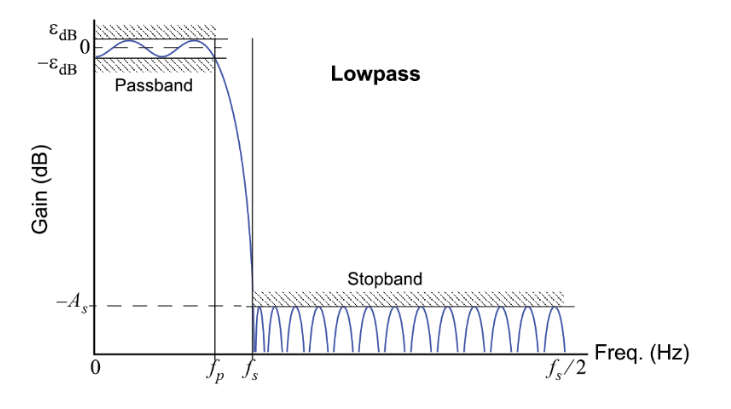

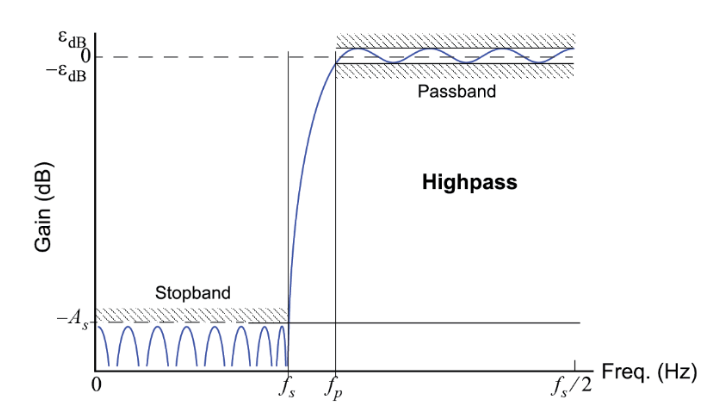

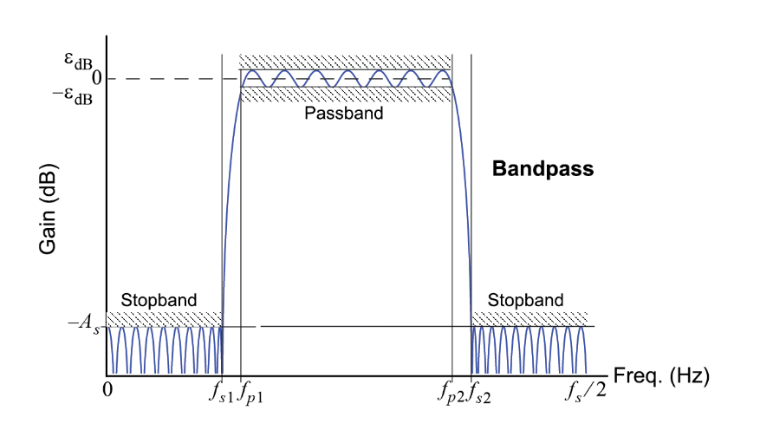

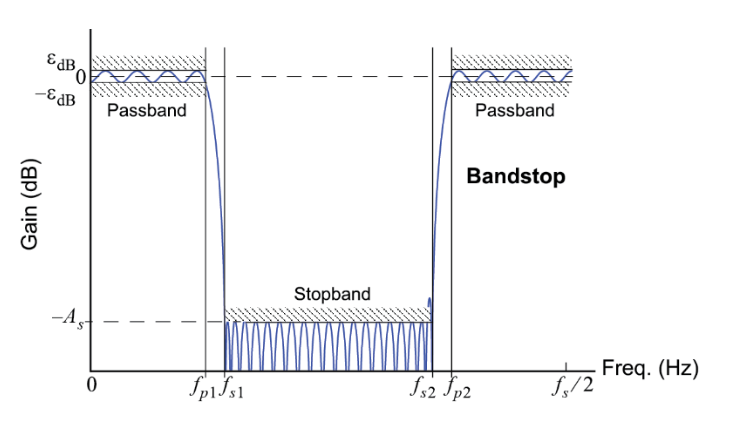

Di dalam fir_design_helper.py, terdapat 10 fungsi desain filter dan satu fungsi plotting. Empat fungsi digunakan untuk merancang filter FIR dengan jendela Kaiser, dan empat lainnya untuk merancang filter FIR dengan pendekatan equiripple. Kedelapan fungsi ini menerima persyaratan respons amplitudo dan mengembalikan array koefisien filter. Dua dari 10 fungsi tersebut adalah pembungkus untuk fungsi scipy.signal.firwin() yang merancang filter berdasarkan urutan tertentu ketika diberikan satu (lowpass) atau dua (bandpass) frekuensi kritis. Fungsi pembungkus ini menggunakan tipe jendela default firwin yaitu hann (hanning). Penjelasan lebih lanjut mengenai delapan fungsi lainnya dapat ditemukan di Tabel 1. Fungsi plotting memungkinkan perbandingan respons frekuensi dari satu atau lebih desain filter dalam satu plot. Mode tampilan dapat menunjukkan gain dalam dB, fase dalam radian, tundaan kelompok dalam sampel, dan tundaan kelompok dalam detik untuk frekuensi pengambilan sampel tertentu. Fungsi freq_resp_list() ini dapat digunakan untuk desain FIR dan IIR. Tabel 1 menyediakan detail antarmuka untuk delapan fungsi desain, di mana d_stop dan d_pass adalah nilai dB positif, dan frekuensi kritis memiliki satuan yang sama dengan frekuensi pengambilan sampel $f_s$. Fungsi-fungsi ini mungkin tidak menghasilkan hasil yang sempurna, sehingga beberapa penyesuaian pada parameter desain bisa diperlukan, selain menambah atau mengurangi urutan filter melalui penyesuaian yang sesuai $N_{bump}$.

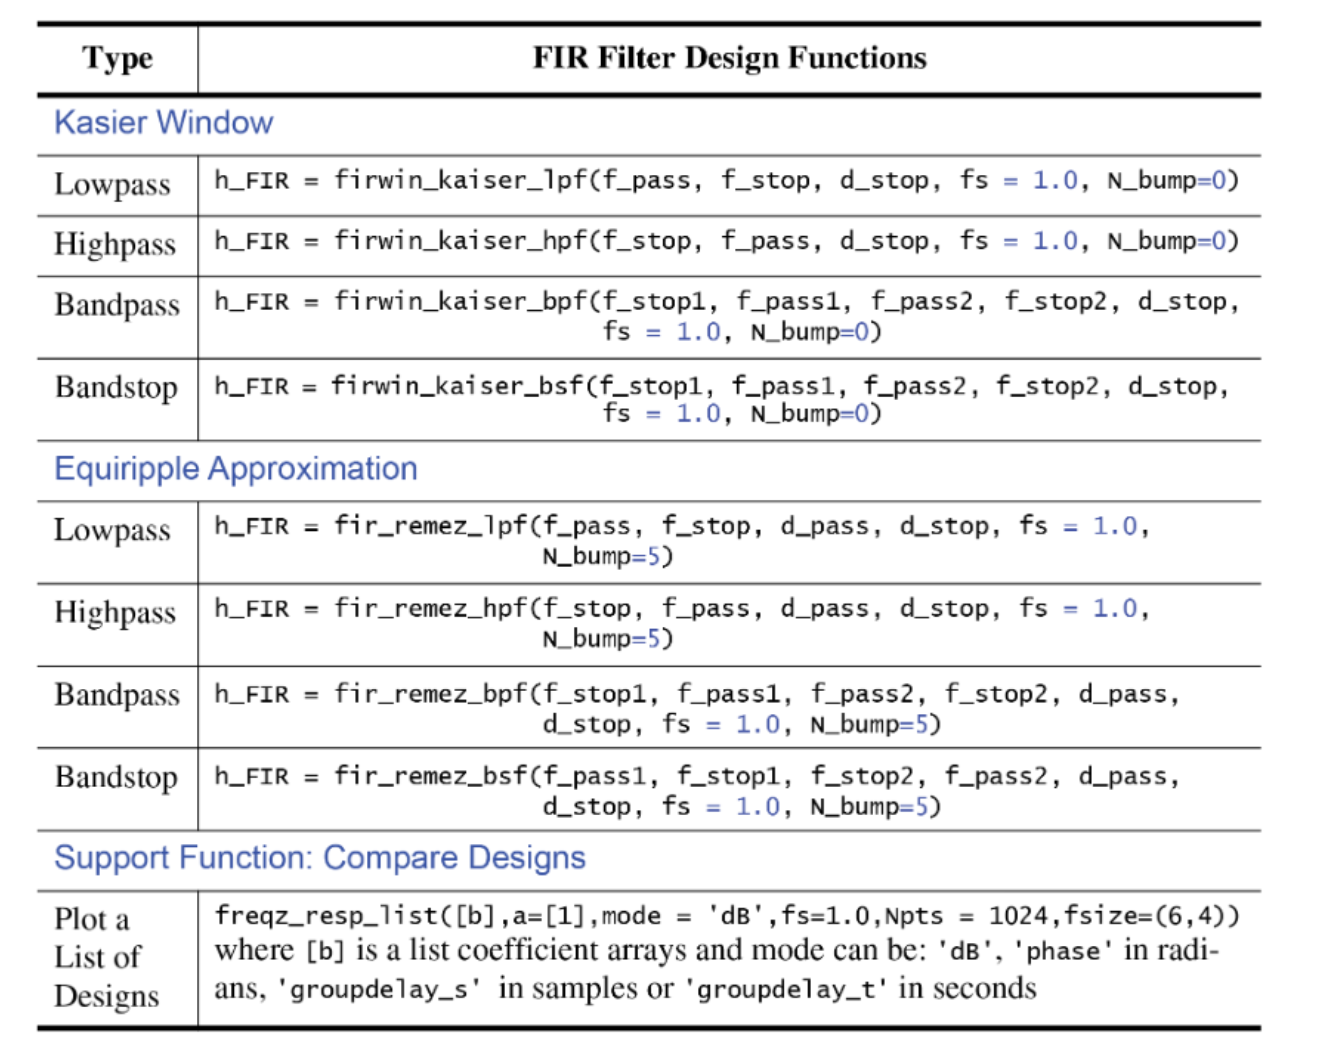

## Design Examples

### Contoh 1: Lowpass dengan $f_s = 1$ Hz.

In [ ]:
b_k = fir_d.firwin_kaiser_lpf(1/8,1/6,50,1.0)
b_r = fir_d.fir_remez_lpf(1/8,1/6,0.2,50,1.0)

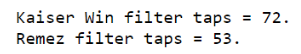

In [ ]:
fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

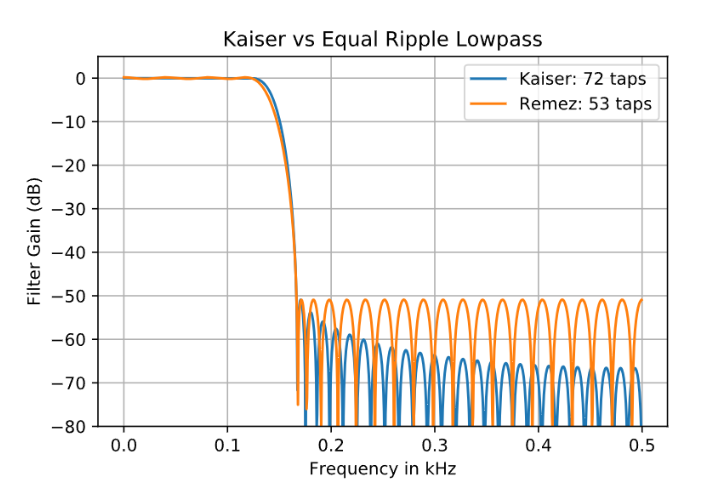

In [ ]:
b_k_hp = fir_d.firwin_kaiser_hpf(1/8,1/6,50,1.0)
b_r_hp = fir_d.fir_remez_hpf(1/8,1/6,0.2,50,1.0)

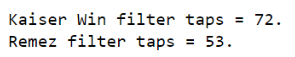

In [ ]:
fir_d.freqz_resp_list([b_k_hp,b_r_hp],[[1],[1]],'dB',fs=1)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Lowpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
grid();

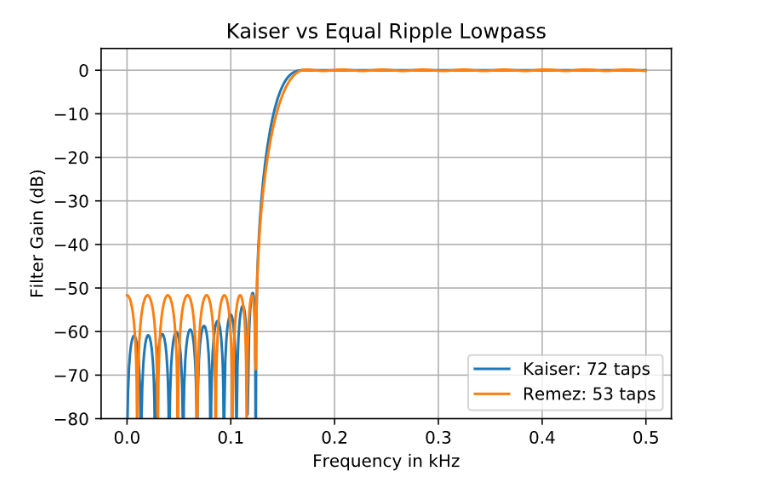

In [ ]:
b_k_bp = fir_d.firwin_kaiser_bpf(7000,8000,14000,15000,50,48000)
b_r_bp = fir_d.fir_remez_bpf(7000,8000,14000,15000,0.2,50,48000)

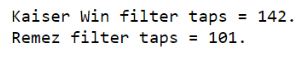

In [ ]:
fir_d.freqz_resp_list([b_k_bp,b_r_bp],[[1],[1]],'dB',fs=48)
ylim([-80,5])
title(r'Kaiser vs Equal Ripple Bandpass')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Kaiser: %d taps' % len(b_k_bp),
        r'Remez: %d taps' % len(b_r_bp)),
       loc='lower right')
grid();

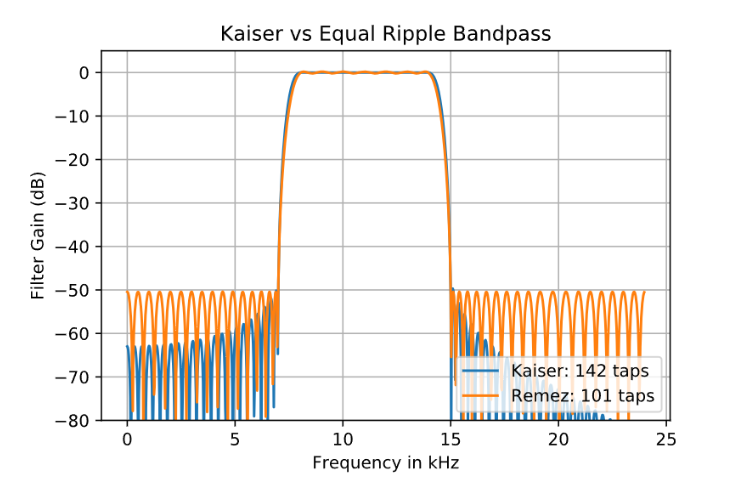

## Contoh Desain yang Berguna untuk Interpolasi atau Desimasi
Di sini kita mempertimbangkan desain lowpass yang harus melewatkan frekuensi dari [0, 4000] Hz dengan laju sampling 96000 Hz. Skenario ini muncul saat membangun interpolator menggunakan kelas-kelas dalam modul scikit-dsp-comm multirate_helper.py untuk meningkatkan laju sampling dari 8000 Hz menjadi 96000 Hz, atau dengan faktor interpolasi sebesar $L = 12$. 

In [ ]:
b_up = fir_d.fir_remez_lpf(3300,4300,0.5,60,96000)

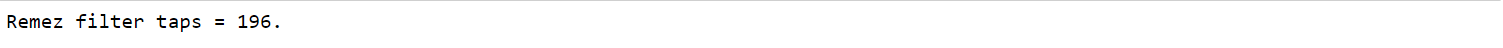

In [ ]:
mr_up = mrh.multirate_FIR(b_up)

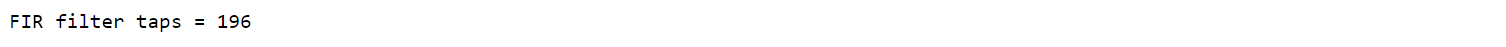

In [ ]:
mr_up.zplane()

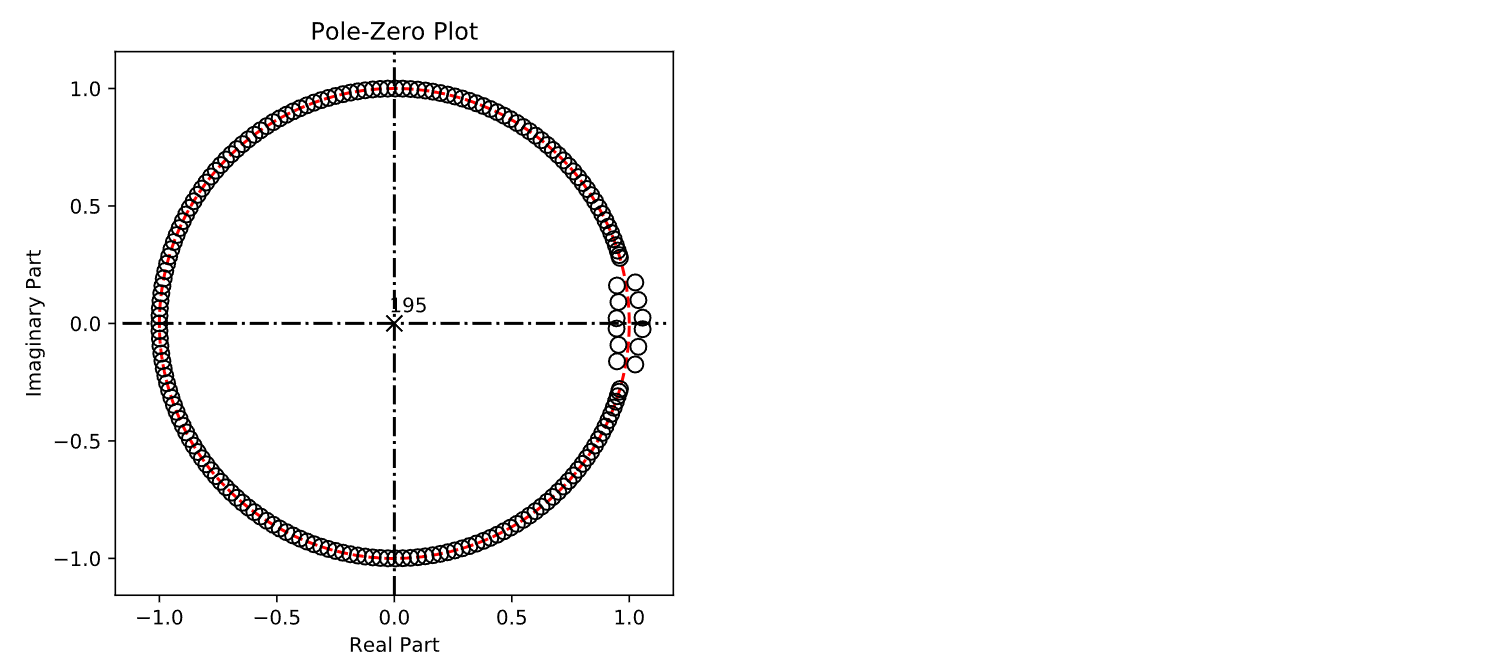

In [ ]:
mr_up.freq_resp('db',96000)

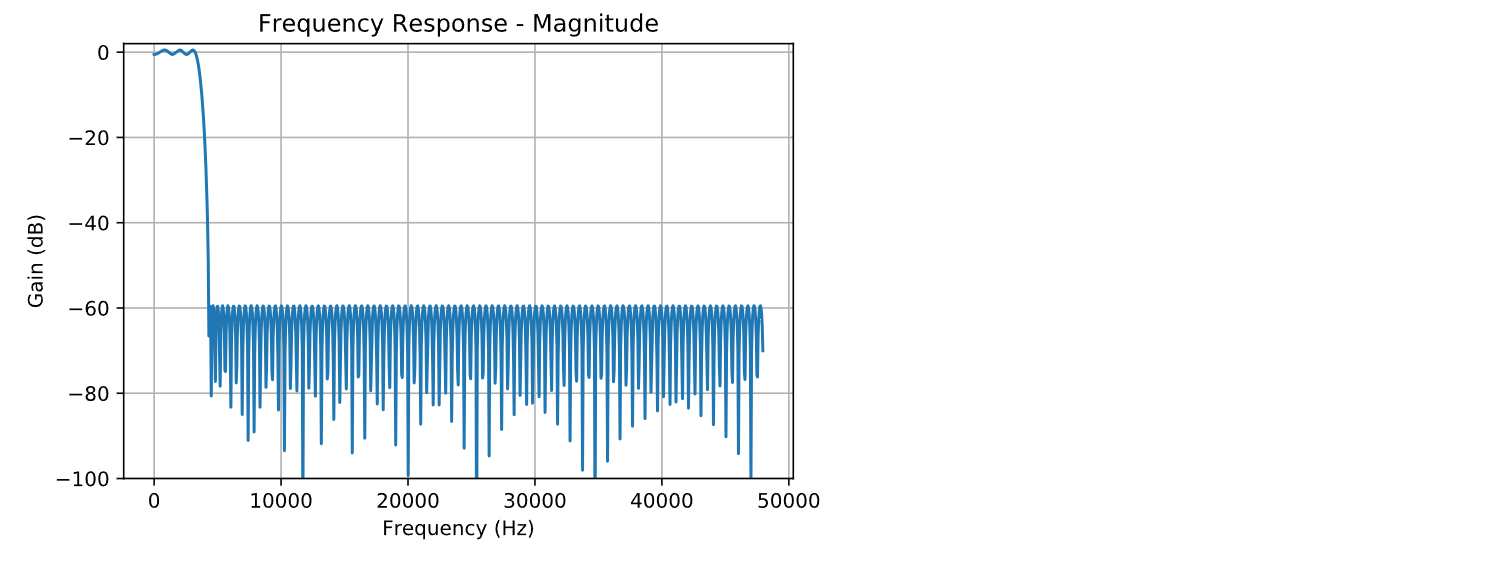

In [ ]:
(len(b_up-1))/2

In [ ]:
mr_up.freq_resp('groupdelay_s',96000,[0,100])

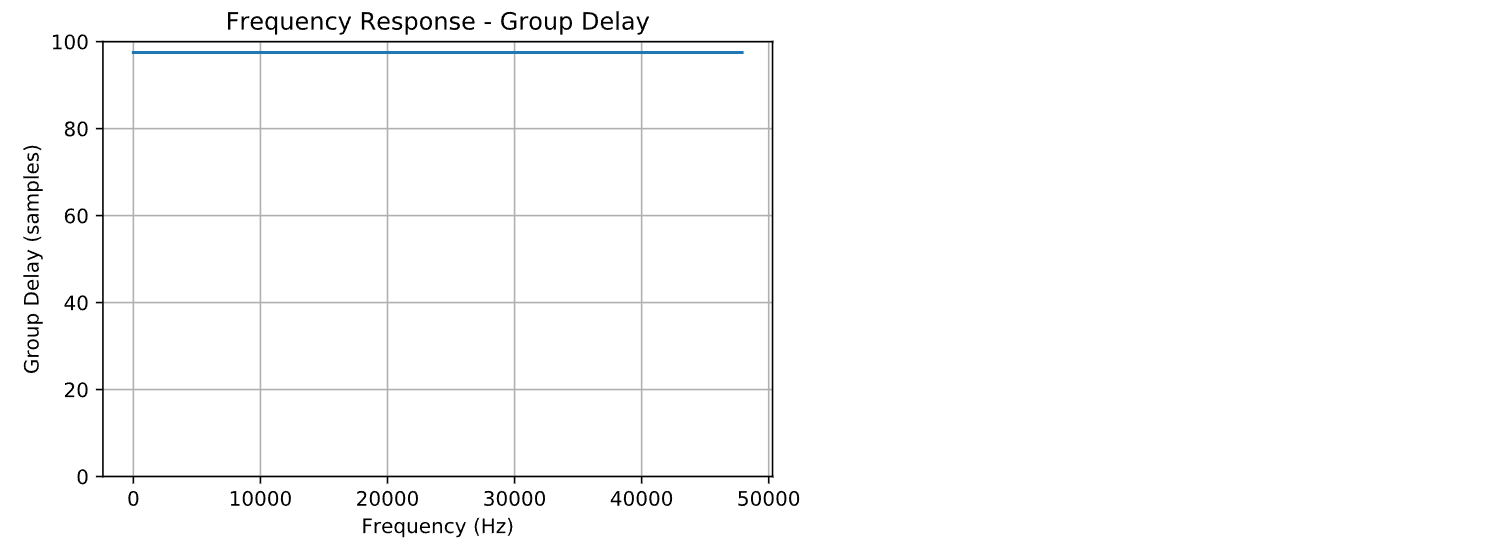

# Desain Filter IIR Tradisional Menggunakan Bilinear Transform
Paket scipy.signal sepenuhnya mendukung desain filter digital IIR dari prototipe analog. Seperti halnya filter FIR, filter IIR biasanya dirancang dengan mempertimbangkan persyaratan respons amplitudo. Beberapa fungsi desain tersedia langsung dari scipy.signal untuk tujuan ini, terutama fungsi scipy.signal.iirdesign(). Untuk membuat desain filter lowpass, highpass, bandpass, dan bandstop yang konsisten dengan modul fir_design_helper.py, modul iir_design_helper.py telah dibuat. Gambar 2 di bawah ini menjelaskan secara grafis bagaimana parameter respons amplitudo didefinisikan.

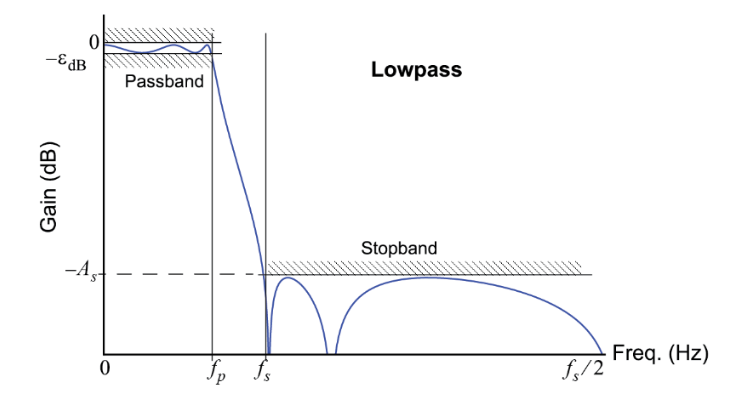

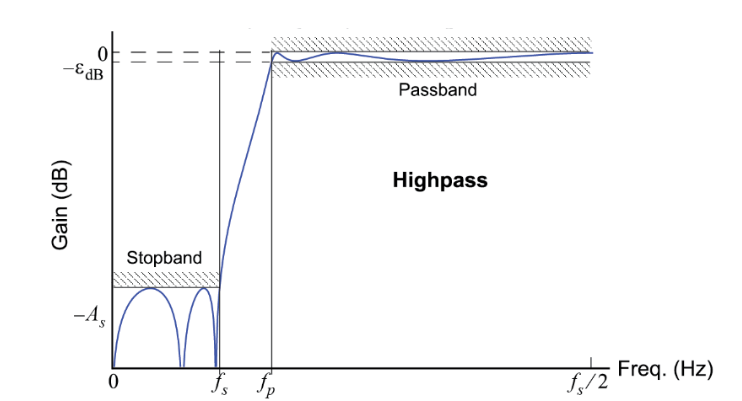

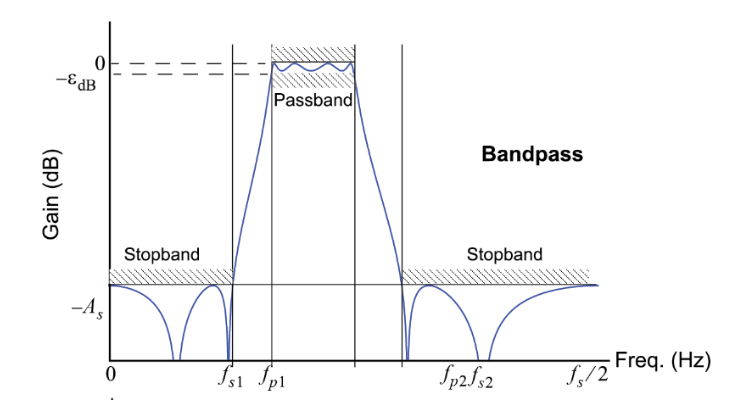

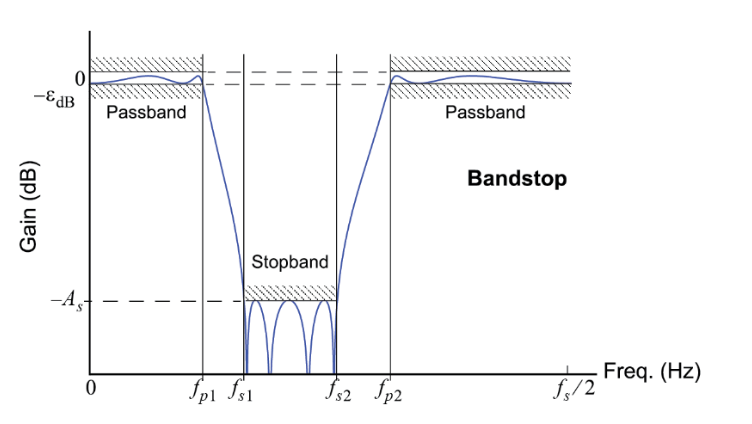

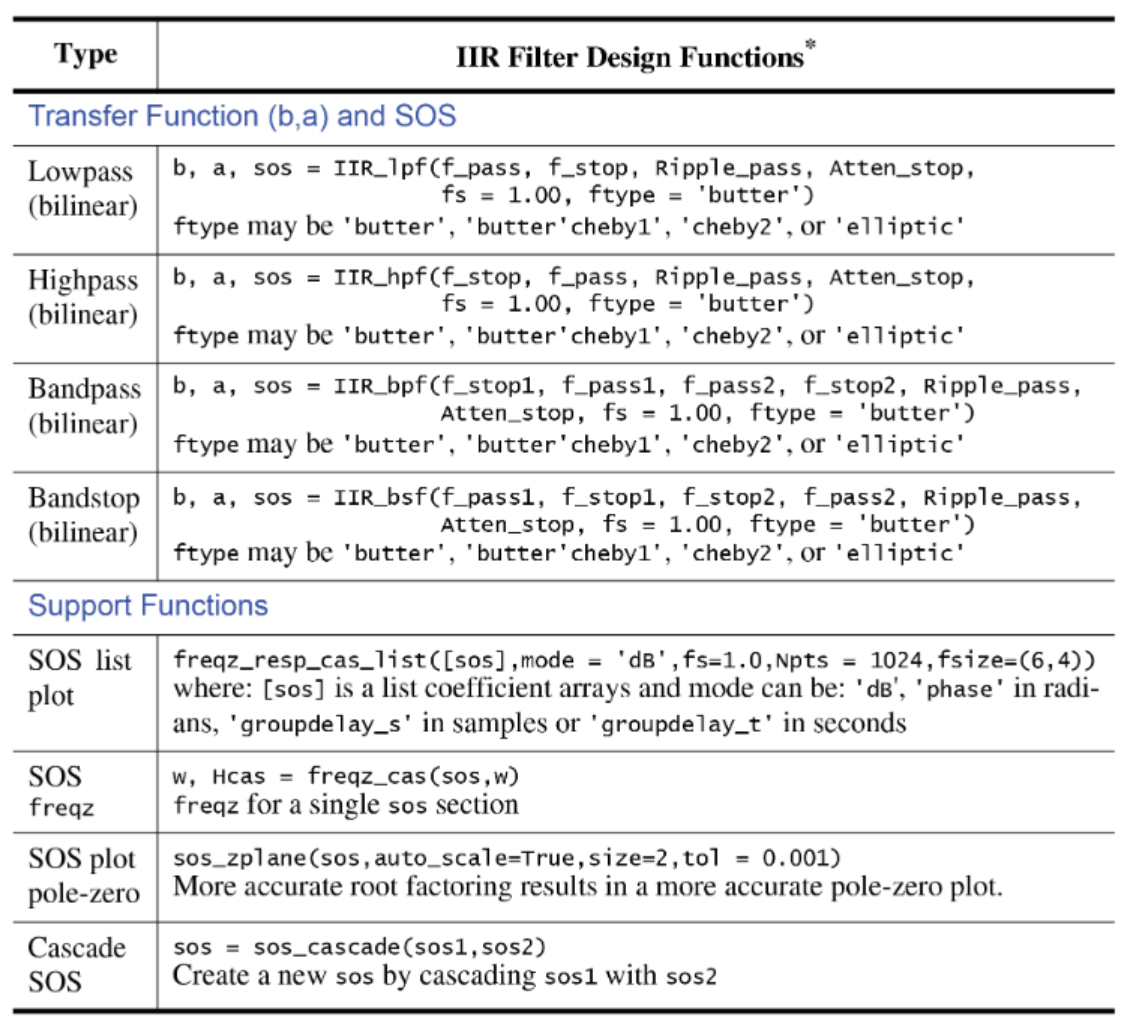

Fungsi filter mengembalikan koefisien filter dalam dua format:

1. Sebagai array koefisien b untuk pembilang dan a untuk penyebut dalam bentuk fungsi transfer tradisional.
2. Sebagai rangkaian bagian biquadratic dalam matriks atau array sos yang sebelumnya dijelaskan.

Kedua format ini disediakan untuk memungkinkan analisis lebih lanjut menggunakan topologi bentuk langsung atau bentuk sos. Fungsi signal.iirdesign() yang mendasarinya juga menawarkan opsi ketiga: daftar pole dan zero. Bentuk sos diinginkan untuk filter presisi tinggi karena lebih tahan terhadap kuantisasi koefisien, meskipun koefisien presisi ganda digunakan dalam array `b` dan `a`.

Dari fungsi pendukung yang tersisa, empat dijelaskan dalam Tabel 2 di atas. Fungsi yang paling signifikan adalah freqz_resp_cs_list, yang tersedia untuk membandingkan respons frekuensi secara grafis di beberapa desain, dan soszplans, yang merupakan fungsi untuk memplot pola pole-zero. Keduanya beroperasi menggunakan matriks sos. Bentuk fungsi transfer (`b/a`) untuk memplot respons frekuensi, freqz_resp_list, juga ada dalam modul ini. Fungsi ini pertama kali diperkenalkan dalam bagian desain FIR. Fungsi plotting respons frekuensi menawarkan mode untuk gain dalam dB, fase dalam radian, delay grup dalam sampel, dan delay grup dalam detik, semuanya untuk laju sampling tertentu dalam Hz yang diberikan. Fungsi plotting pole-zero mengidentifikasi pole dan zero dengan lebih akurat daripada sk_dsp_comm.sigsys.zplane, karena fungsi numpy roots() hanya menyelesaikan polinomial kuadrat. Selain itu, akar berulang dapat ditampilkan sesuai dengan yang diharapkan secara teoretis, dan ditampilkan dalam grafik dengan superskrip di samping penanda pole dan zero.n zero.

## Desain IIR Berdasarkan Transformasi Bilinear
Ada beberapa metode untuk merancang filter IIR berdasarkan persyaratan respons amplitudo. Jika tujuannya adalah agar aproksimasi filter mengikuti prototipe analog seperti Butterworth, Chebyshev, dll., kita dapat menggunakan transformasi bilinear. Fungsi signal.iirdesign() yang dijelaskan sebelumnya melakukan hal ini dengan baik.

Dalam contoh berikut, kita akan mempertimbangkan persyaratan respons amplitudo untuk filter lowpass dan melihat bagaimana urutan filter berubah ketika kita memilih berbagai prototipe analog.

### Contoh: Perbandingan Desain Lowpass
Persyaratan respons amplitudo lowpass dengan $f_s = 48$ kHz adalah:
1. $f_\text{pass} = 5$ kHz
2. $f_\text{stop} = 8$ kHz
3. Ripple passband sebesar 0.5 dB
4. Attenuasi stopband sebesar 60 dB

Rancang empat filter untuk memenuhi persyaratan yang sama: butter, cheby1, cheby2, dan ellip:

In [ ]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')

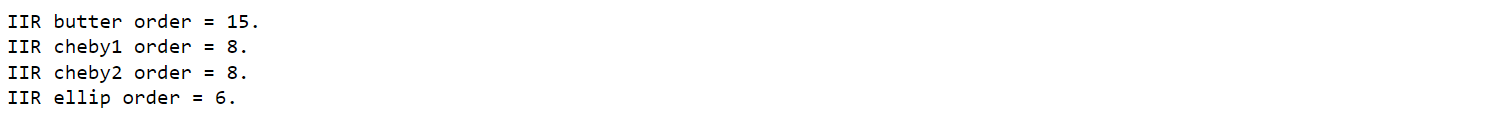

#### Perbandingan Respons Frekuensi.

In [ ]:
iir_d.freqz_resp_cas_list([sos_but,sos_cheb1,sos_cheb2,sos_elli],'dB',fs=48)
ylim([-80,5])
title(r'IIR Lowpass Compare')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Butter order: %d' % (len(a_but)-1),
        r'Cheby1 order: %d' % (len(a_cheb1)-1), 
        r'Cheby2 order: %d' % (len(a_cheb2)-1), 
        r'Elliptic order: %d' % (len(a_elli)-1)),loc='best')
grid();

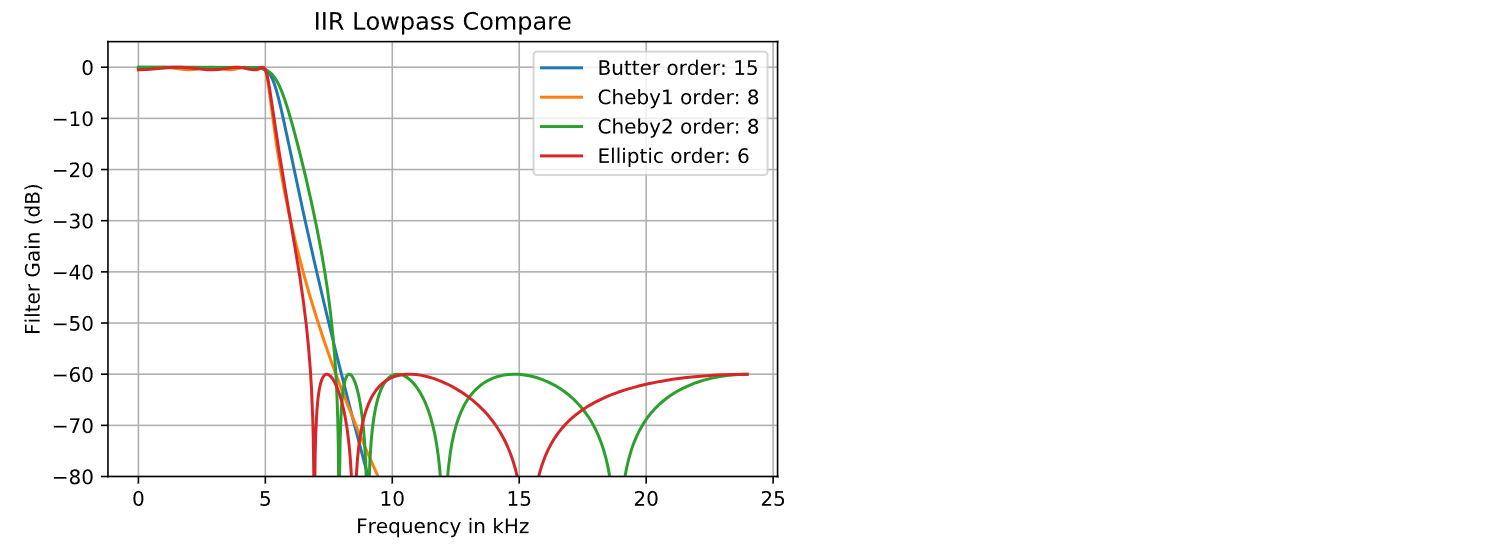

In [ ]:
iir_d.sos_zplane(sos_but)

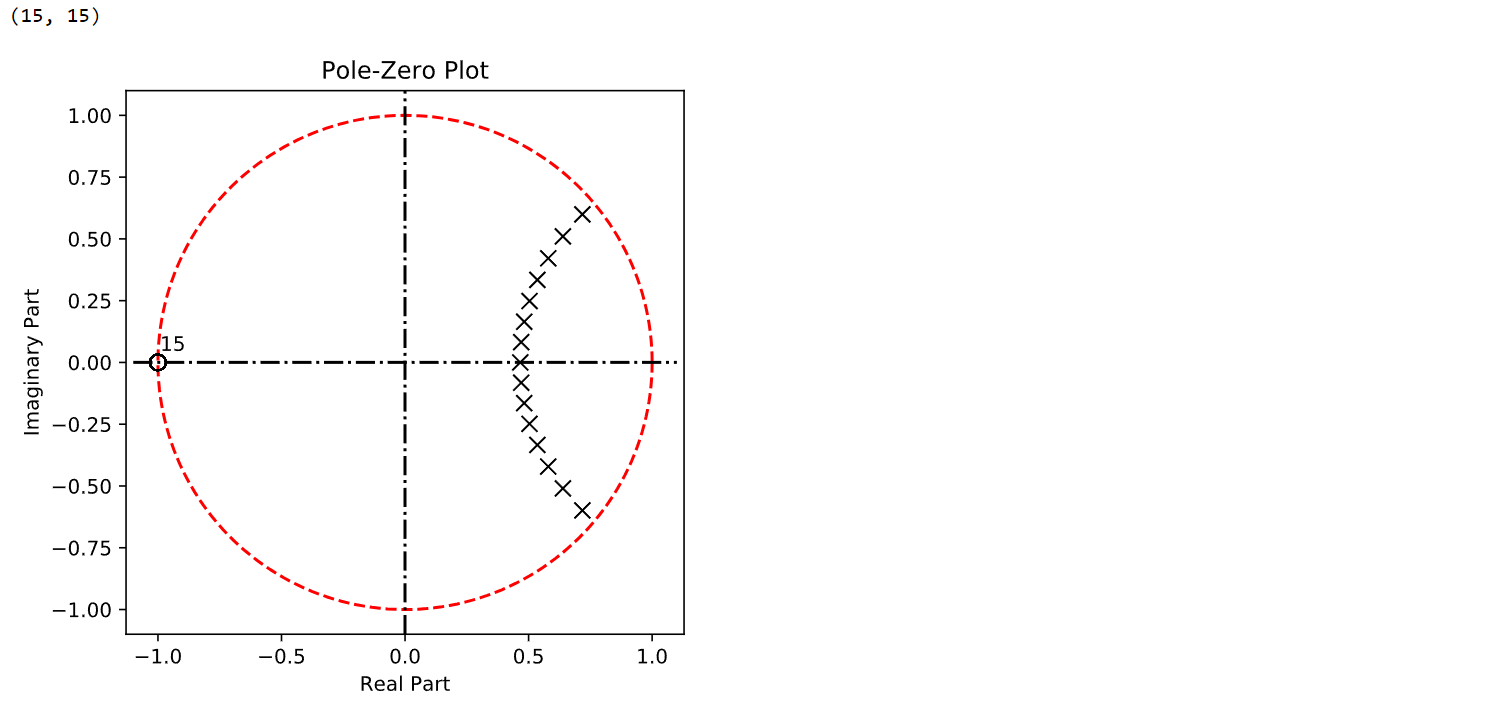

Harap dicatat bahwa kedua plot di atas juga dapat diperoleh menggunakan bentuk fungsi transfer melalui iir_d.freqz_resp_list([b],[a],'dB',fs=48) dan ss.zplane(b,a) masing-masing. Penggunaan bentuk sos akan memberikan hasil yang lebih akurat karena kurang sensitif terhadap kuantisasi koefisien. Hal ini terutama berlaku untuk plot pole-zero, karena proses rooting polinomial derajat ke-15 jauh lebih rentan terhadap kesalahan dibandingkan dengan rooting polinomial kuadrat sederhana.

Untuk Butterworth orde ke-15, transformasi bilinear memetakan 15 nol domain-s ke tak hingga menjadi $z=-1$. Jika Anda menggunaka `sk_dsp_comm.sigsys.zplane)`, Anda akan menemukan bahwa 15 nol berada dalam lingkaran rapat di sekitar $z=-1$, menunjukkan kesalahan merooting polinomial. Demikian pula, respons frekuensi akan lebih akurat.

Pemfilteran sinyal dari array `x` dilakukan menggunakan desain filter dengan fungsi dari `scipy.signal`:

1. Untuk bentuk fungsi transfer `y = signal.lfilter(b,a,x)`
2. Untuk bentuk sos `y = signal.sosfilt(sos,x)`sos,x)`

## Desain Filter Half-Band untuk Melewati hingga $W/2$ saat $f_s = 8$ kHzDi sini, kita mempertimbangkan desain filter lowpass yang harus melewati frekuensi hingga $f_s/4$. Secara khusus, ketika $f_s = 8000$ Hz, rentang passband filter menjadi [0, 2000] Hz. Setelah koefisien ditemukan, sebuah objek `mrh.multirate` dibuat untuk memungkinkan studi lebih lanjut tentang filter, dan kemudian menerapkan filtering pada sinyal white noise.

Kita akan memulai dengan desain eliptikal yang memiliki transition band yang berpusat pada 2000 Hz dengan ripple passband sebesar 0.5 dB dan attenuasi stopband sebesar 80 dB. Lebar bandwidth transisi diatur menjadi 100 Hz, dengan 50 Hz di setiap sisi dari 2000 Hz.Hz.

In [ ]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)

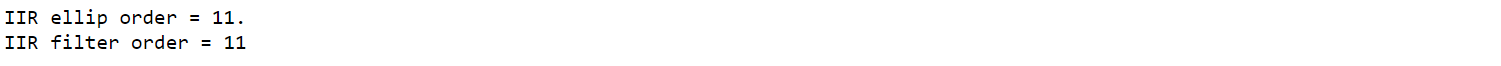

In [ ]:
mr_lp.freq_resp('db',8000)

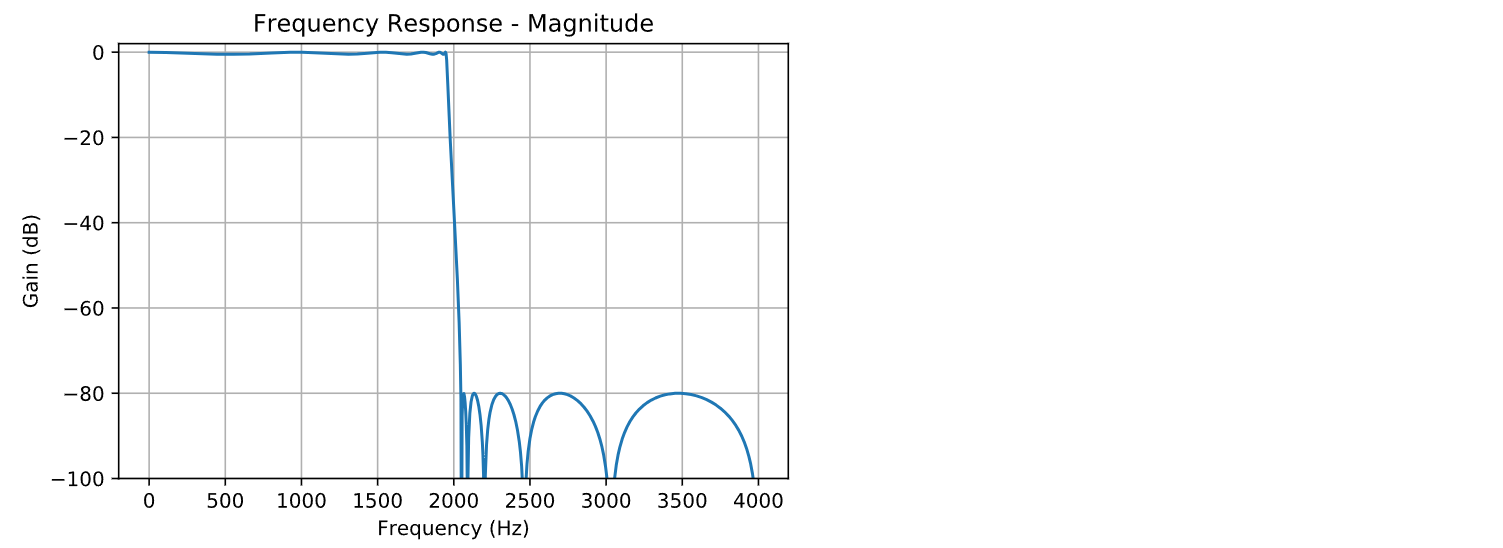

In [ ]:
x = randn(1000000)
y = mr_lp.filter(x)
psd(x,2**10,8000);
psd(y,2**10,8000);
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD','Output PSD'),loc='best')
ylim([-130,-30])

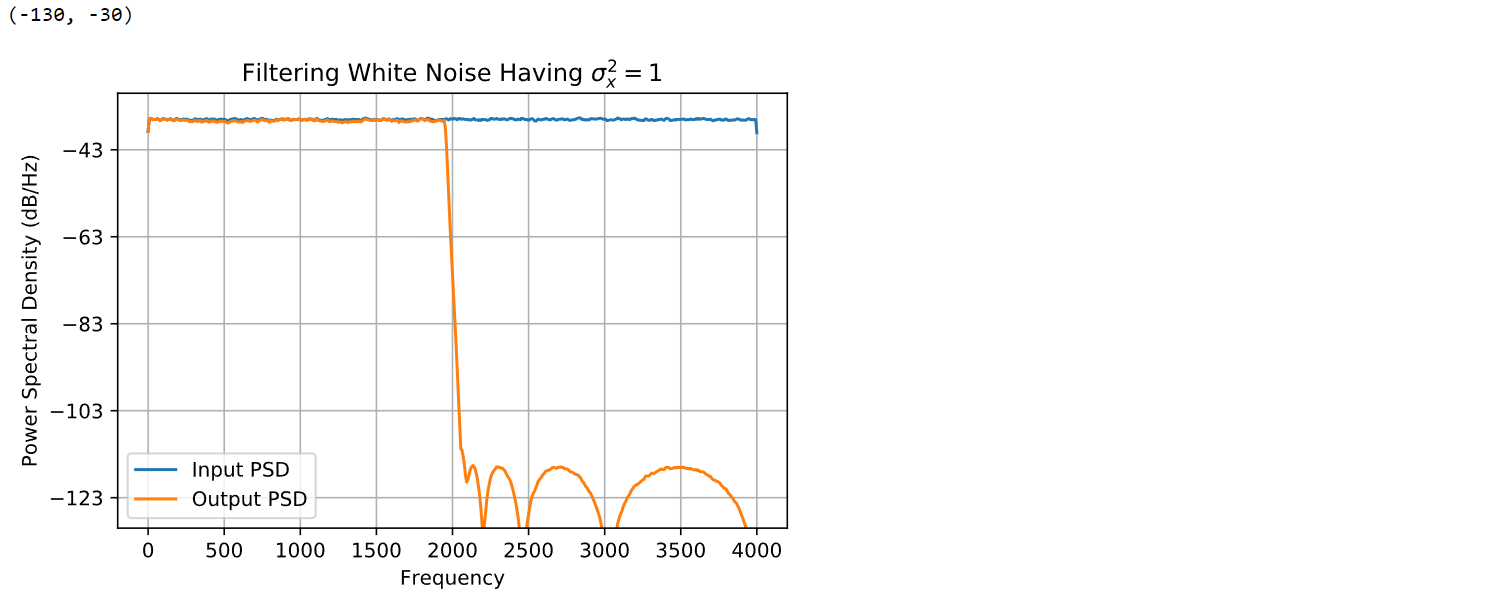

In [ ]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

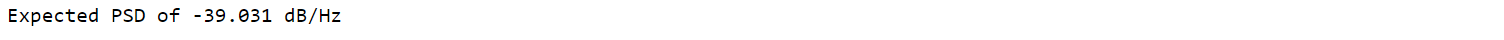

## Desain Bandpass Respons Amplitudo.

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)
ylim([-80, 5])
grid();

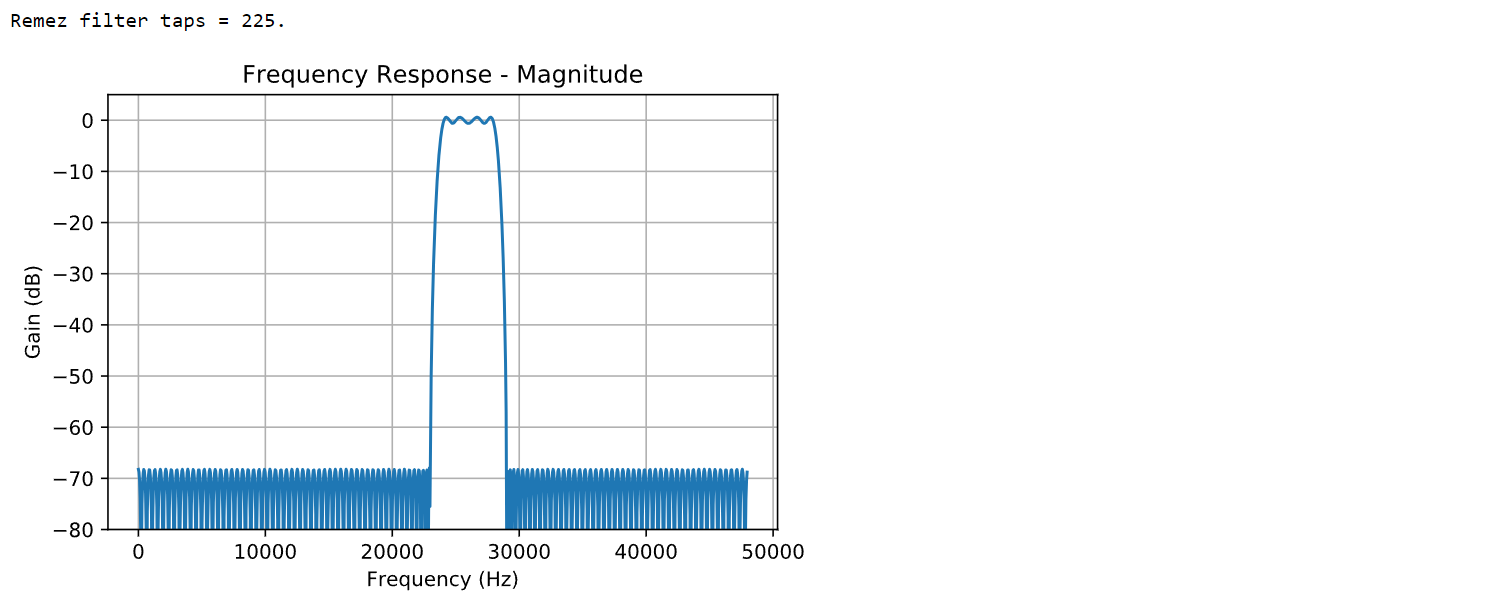

In [ ]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)
grid();

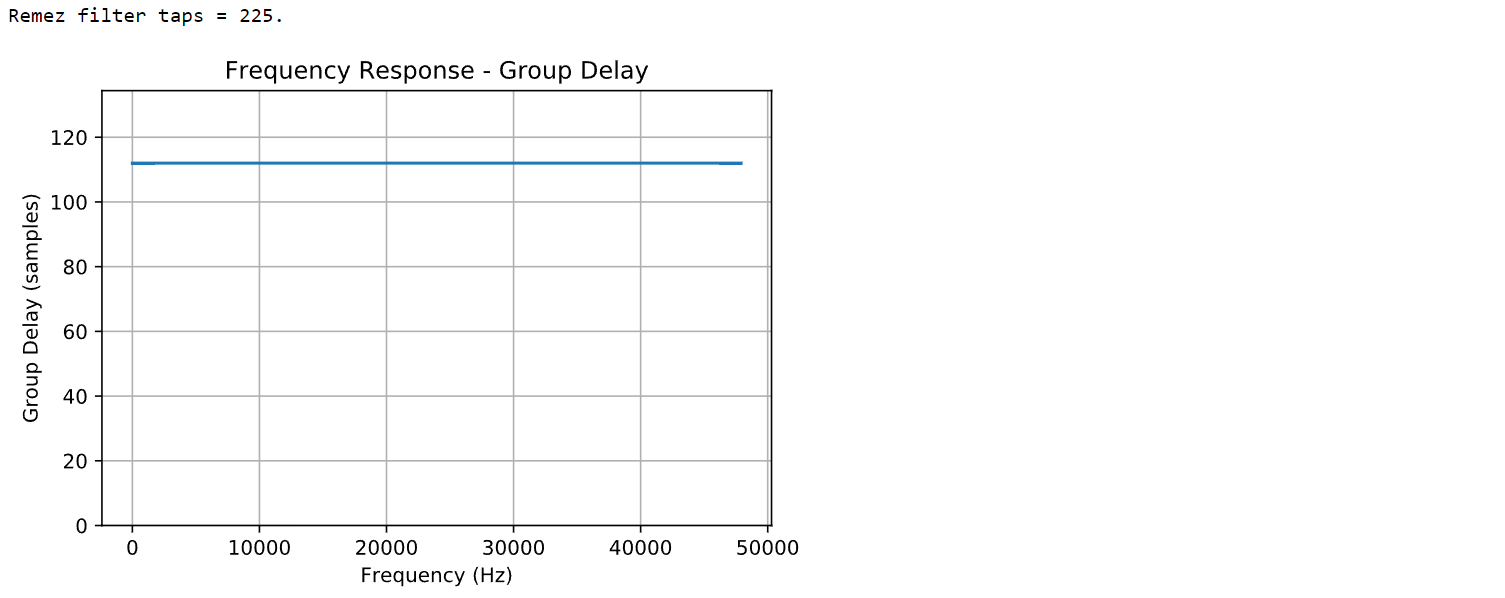

In [ ]:
b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                   0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
ylim([-80, 5])
grid();

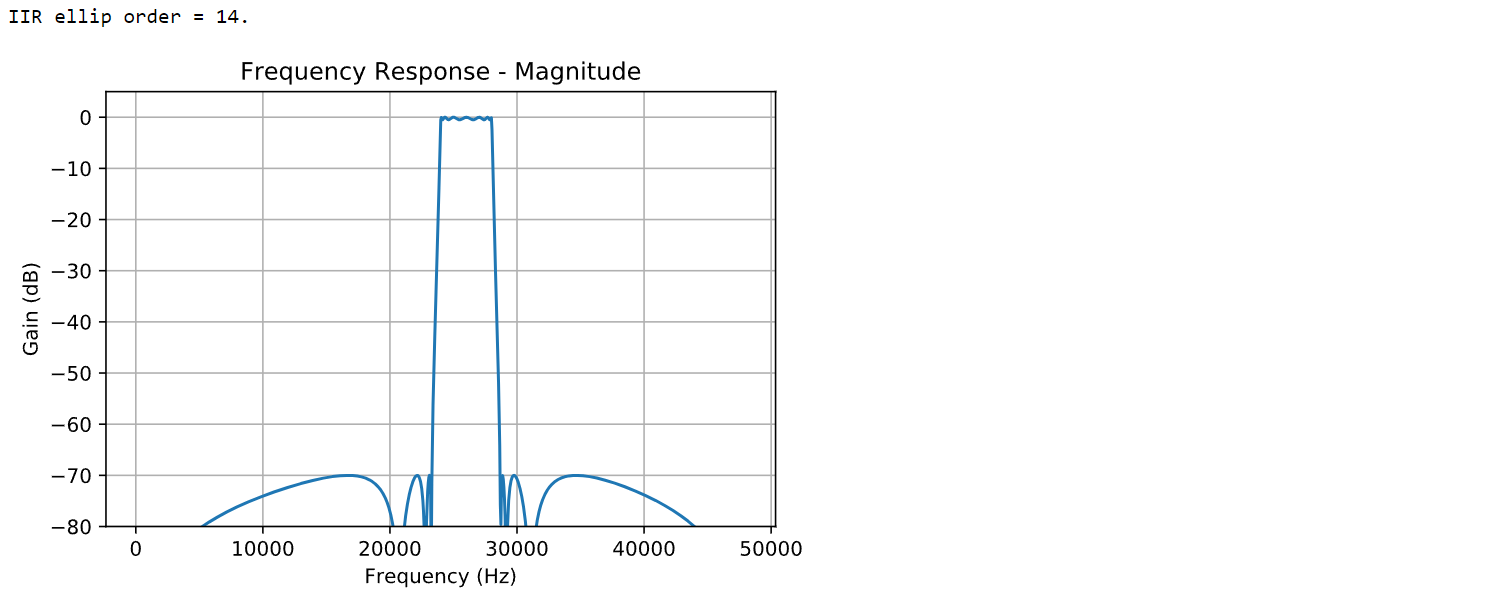

In [ ]:
with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
grid();

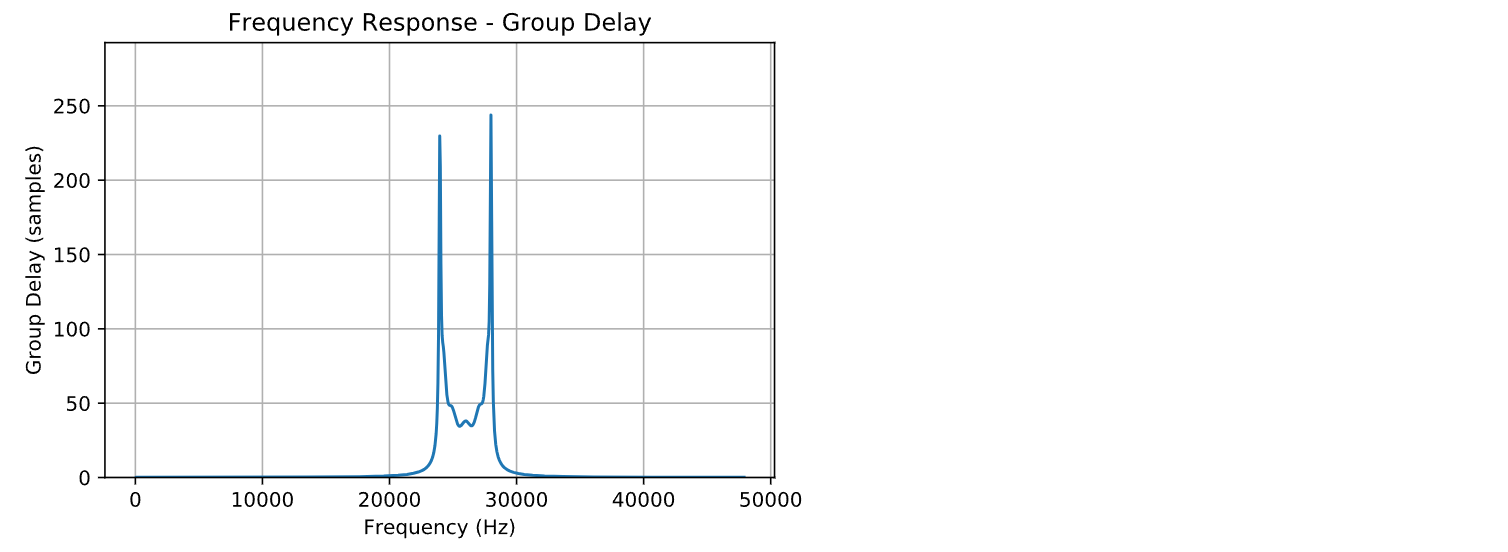